## 2. Regresión Logística de dataset heart_cleveland_upload

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
import pandas as pd

Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad cardíaca.

In [2]:
data = pd.read_csv("./csv/heart_cleveland_upload.csv", sep=",")

## 1. Análisis exploratorio de los datos

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data.shape

(297, 14)

## 2. Identificación de valores faltantes y atípicos

Imprime true si hay columnas con valores vacios o false si estan todos llenos

In [5]:
print(data.isnull().any())

age          False
sex          False
cp           False
trestbps     False
chol         False
fbs          False
restecg      False
thalach      False
exang        False
oldpeak      False
slope        False
ca           False
thal         False
condition    False
dtype: bool


In [6]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

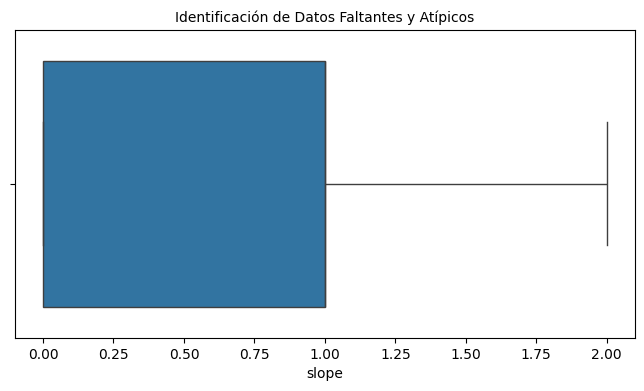

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['slope'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [8]:
data.groupby(['age']).count()['sex']

age
29     1
34     2
35     4
37     2
38     1
39     4
40     3
41    10
42     8
43     7
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    11
53     7
54    16
55     8
56    11
57    17
58    18
59    14
60    12
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: sex, dtype: int64

In [18]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

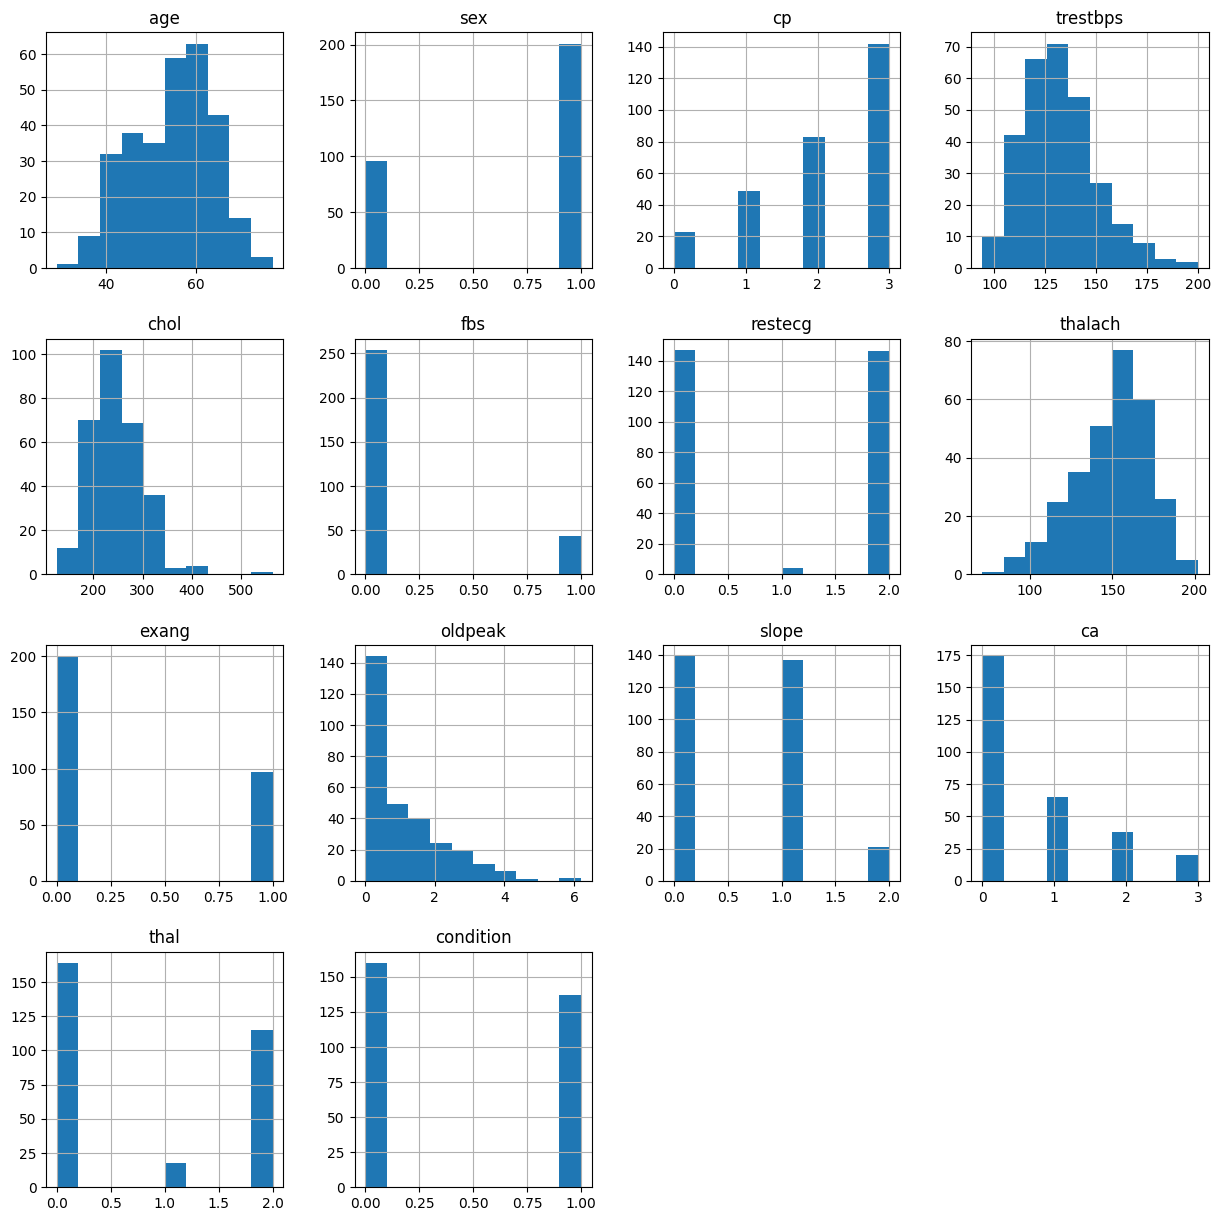

In [19]:
data.hist(figsize=(15, 15))

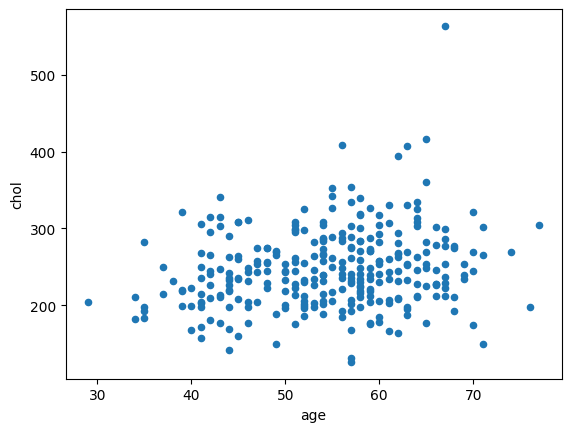

In [11]:
#Realizo la grafica de dispersión
data.plot.scatter(x="age", y="chol")
plt.show()


In [12]:
cantidad_año = data.groupby(['age', "oldpeak"]).count()['chol']

In [13]:
cantidad_año

age  oldpeak
29   0.0        1
34   0.0        1
     0.7        1
35   0.0        2
     1.4        1
               ..
71   0.4        1
     1.6        1
74   0.2        1
76   1.1        1
77   0.0        1
Name: chol, Length: 208, dtype: int64

In [14]:
cantidad_año1 = data.groupby(['age']).count()['condition']

Text(0, 0.5, 'Pacientes')

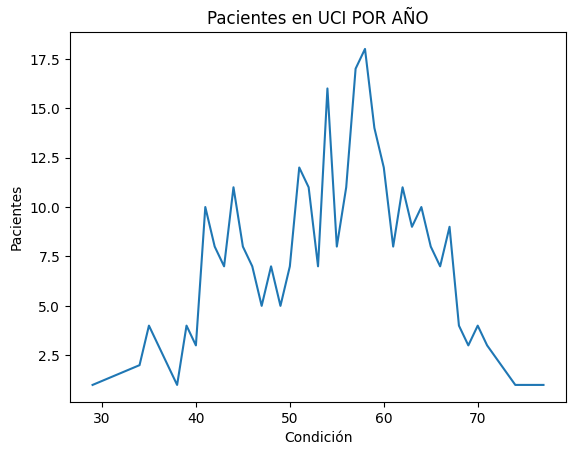

In [15]:
plt.plot(cantidad_año1)
plt.title("Pacientes en UCI POR AÑO")
plt.xlabel("Condición")
plt.ylabel("Pacientes")

In [16]:
regresion = linear_model.LinearRegression()

In [20]:
#Agrego los datos en un array o vector
years = data["age"].values.reshape((-1,1))

In [21]:
#Ahora si creamos el modelo
modelo = regresion.fit(years, data["chol"])

In [22]:
print("Interseccion (b)", modelo.intercept_)
#imprimos la pendiente
print("Pendiente (m)", modelo.coef_)

Interseccion (b) 183.844602455182
Pendiente (m) [1.16434058]


In [23]:
entrada = [[1980],[1990],[2000],[2010],[2019]]
predicciones = modelo.predict(entrada)
print(predicciones)

[2489.23895274 2500.88235855 2512.52576436 2524.16917016 2534.64823539]


In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

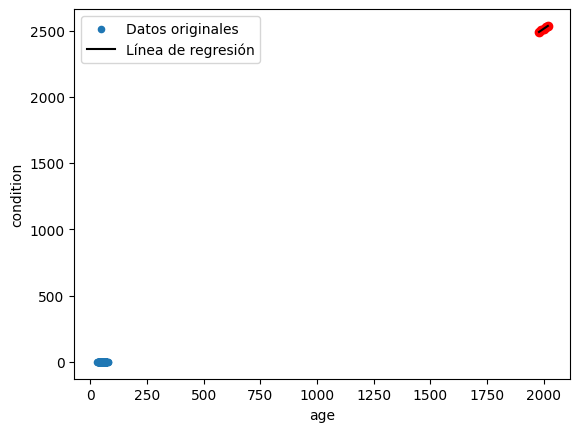

In [34]:
data.plot.scatter(x="age", y="condition", label='Datos originales')
plt.scatter(entrada, predicciones, color='red')
plt.plot(entrada, predicciones, color='black', label='Línea de regresión')
plt.xlabel('age')
plt.ylabel('condition')
plt.legend()
plt.show()

In [35]:
data['age'].min()

29

In [36]:
# Prueba de parametros
w = 125
b = 0

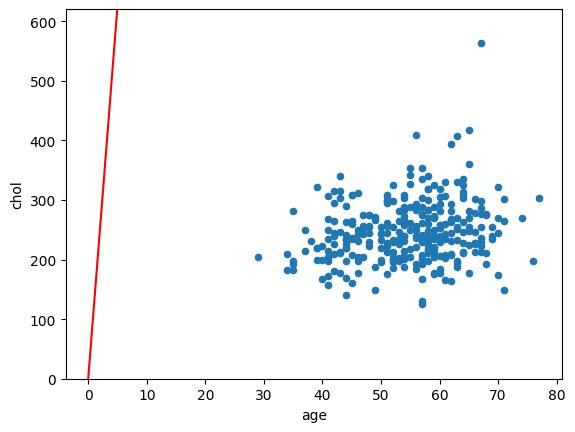

In [40]:
# puntos de la recta
x = np.linspace(0,data['age'].max(),100)
y = w*x+b


#Grafica de la recta
data.plot.scatter(x='age',y='chol')
plt.plot(x, y, '-r')
plt.ylim(0,data['chol'].max()*1.1)
# plt.grid()
plt.show()

In [41]:
#Calculo de Predicicones
data['chol'] = data['age']*w+b

In [45]:
#Calculo de la funcion de Error
data['chol'] = data['condition']-data['age']
data['chol'] = data['condition']**2
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,0,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,0,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,0,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,1,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,0,0,2,144,1,1.8,1,0,0,0


In [46]:
data['chol'].mean()

0.4612794612794613

In [57]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [58]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [59]:
def sum_error(w, data):
    b = 0
    data['condition'] = data['age']*w+b
    data['chol'] = data['condition']-data['sex']
    data['slope'] = data['chol']**2
    return(data['slope'].mean())

In [60]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, data=data))
grid_error.head()

,w,error
0,50.000000,7.637502e+06
1,53.061224,8.601572e+06
2,56.122449,9.622927e+06
3,59.183673,1.070157e+07
4,62.244898,1.183749e+07


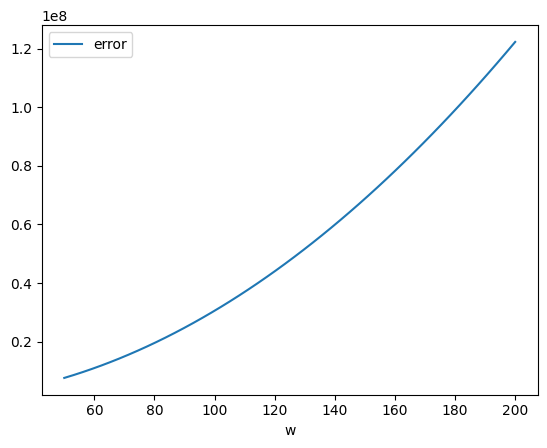

In [61]:
grid_error.plot(x='w',y='error')
plt.show()